## DATA PRE-PROCESSING

In [315]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [316]:
#load data

df = pd.read_csv('/home/student/Desktop/ML_210962162/Lab_3/diabetes_csv.csv')

In [317]:
# drop columns which are not useful

cols = ['protime']
df = df.drop(cols, axis=1)

In [318]:
# drop rowss with missing values

df=df.dropna()

In [319]:
# create dummy variables

dummies = []
cols = ['sex','class']
for col in cols:
    dummies.append(pd.get_dummies(df[col]))

hep_dummies = pd.concat(dummies, axis=1)
df = pd.concat((df,hep_dummies), axis=1)
df = df.drop(['sex','class'], axis=1)

In [320]:
# convert data frame to numpy

X = df.values
Y = df['live'].values
X = np.delete(X, 1, axis=1)

In [321]:
# dividing dataset into training and test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


##  LINEAR REGRESSION

In [322]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [323]:
x = np.array(df['albumin'].values).reshape(-1,1)
y = np.array(df['live'].values)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [324]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [325]:
r_sq = model.score(x_test, y_test)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.3222253080094214


In [326]:
print(f"intercept (B0): {model.intercept_}")
print(f"slope (B1): {model.coef_}")

intercept (B0): 0.06246777163904227
slope (B1): [0.20294659]


In [327]:
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[0.87425414 0.77278085 0.87425414 0.87425414 0.95543278 0.81337017
 0.85395948 1.05690608 0.65101289 0.93513812 0.87425414 0.8945488
 0.91484346 0.91484346 0.8945488  0.87425414 1.01631676 0.93513812
 0.83366483 0.81337017 0.61042357 0.83366483 0.9960221  0.83366483
 1.07720074 0.83366483 0.93513812 0.91484346 0.8945488  0.85395948
 0.87425414 0.65101289 0.87425414 0.95543278 0.95543278 0.95543278
 0.83366483 0.73219153 0.91484346 0.91484346 0.87425414 0.87425414
 0.95543278 0.87425414 0.91484346 0.85395948 0.93513812 0.97572744
 0.87425414 0.75248619 0.69160221 0.77278085 0.67130755 0.87425414
 0.81337017 0.93513812 1.13808471 0.8945488  0.73219153 0.87425414
 0.95543278 1.05690608 0.91484346 0.87425414 0.85395948 0.87425414
 0.63071823 0.63071823 0.95543278 0.75248619 0.79307551 0.91484346
 0.85395948 0.77278085 0.91484346 0.61042357 0.67130755 0.85395948
 0.48865562 0.79307551 0.67130755 0.91484346 0.83366483 0.87425414
 0.67130755 0.73219153 0.85395948 0.8336648

In [328]:
mse = mean_squared_error(x, y_pred)
rmse = math.sqrt(mse)
print('Root mean square error:',rmse)

Root mean square error: 3.0288171905939874


In [329]:
## alternate way to predict

y_pred = model.intercept_ + model.coef_ * x
print(f"predicted response:\n{y_pred}")


predicted response:
[[0.87425414]
 [0.77278085]
 [0.87425414]
 [0.87425414]
 [0.95543278]
 [0.81337017]
 [0.85395948]
 [1.05690608]
 [0.65101289]
 [0.93513812]
 [0.87425414]
 [0.8945488 ]
 [0.91484346]
 [0.91484346]
 [0.8945488 ]
 [0.87425414]
 [1.01631676]
 [0.93513812]
 [0.83366483]
 [0.81337017]
 [0.61042357]
 [0.83366483]
 [0.9960221 ]
 [0.83366483]
 [1.07720074]
 [0.83366483]
 [0.93513812]
 [0.91484346]
 [0.8945488 ]
 [0.85395948]
 [0.87425414]
 [0.65101289]
 [0.87425414]
 [0.95543278]
 [0.95543278]
 [0.95543278]
 [0.83366483]
 [0.73219153]
 [0.91484346]
 [0.91484346]
 [0.87425414]
 [0.87425414]
 [0.95543278]
 [0.87425414]
 [0.91484346]
 [0.85395948]
 [0.93513812]
 [0.97572744]
 [0.87425414]
 [0.75248619]
 [0.69160221]
 [0.77278085]
 [0.67130755]
 [0.87425414]
 [0.81337017]
 [0.93513812]
 [1.13808471]
 [0.8945488 ]
 [0.73219153]
 [0.87425414]
 [0.95543278]
 [1.05690608]
 [0.91484346]
 [0.87425414]
 [0.85395948]
 [0.87425414]
 [0.63071823]
 [0.63071823]
 [0.95543278]
 [0.75248619]


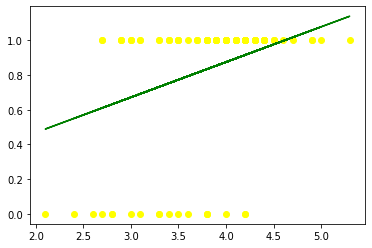

In [330]:
plt.scatter(x, y, label = "line 1", color='yellow')
plt.plot(x, y_pred, label = "line 2", color='green')